In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
nsd_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/'
fs_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer'
# inputs
subj = utils.sub_number_to_string(1, dataset='nsdsyn')
hemi = 'lh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsyn_stim_description.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.{prf_param}.mgz')
        for prf_param in ["prfeccentricity", "prfangle", "prfsize", "prfexponent", "R2"]]

In [4]:
lh_df = prep.make_sf_dataframe(stim_info,
                                design_mat,
                                rois, rois_vals,
                                prfs,
                                betas,
                                drop_phase=False, force_download=False,
                                task_keys=['fixation','memory'], task_average=False,
                                angle_to_radians=True)

In [ ]:
lh_df.rename(columns={'size': 'size_exponent'}, inplace=True)
lh_df['size'] = lh_df['size_exponent']*np.sqrt(lh_df['exponent'])


In [7]:
lh_df = vs.select_voxels(lh_df,
                        drop_by='pRFsize',
                        inner_border=0.5,
                        outer_border=3, eccentricity='eccentricity', size='size',
                        to_group=['voxel'], return_voxel_list=False)


In [9]:
np.max(lh_df['eccentricity']+lh_df['size'])

2.999079942703247

In [38]:
fixation_radius = vs.pix_to_deg(42.878)
stim_radius = vs.pix_to_deg(714/2)

In [53]:
vs_df = vs.select_voxels(lh_df,
                 drop_by='pRFsize',
                inner_border=fixation_radius,
                outer_border=stim_radius,
                to_group=['voxel'], return_voxel_list=False)

In [54]:
vs_df.voxel.nunique()

1387

In [46]:
ori_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/dset-nsdsyn_sub-subj01_roi-V1_vs-pRFsize_tavg-False.csv')

In [49]:
ori_df.query('hemi == "lh"').voxel.nunique()

1055

NameError: name 'prep' is not defined

Text(0, 0.5, 'pRF Size')

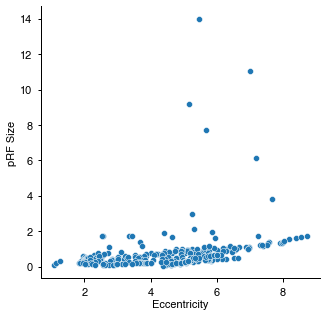

In [34]:
prf_df = pd.DataFrame(prf_dict).reset_index().rename(columns={'index': 'voxel'})
prf_df['sigma'] = prf_df['size']*np.sqrt(prf_df['exponent'])
prf_df = prf_df.query('30 < R2')
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(data=prf_df, x='eccentricity', y='sigma', ax=ax)
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
# ax.set_aspect('equal')
ax.set_xlabel('Eccentricity')
ax.set_ylabel('pRF Size')


In [9]:
stim_df = prep.load_stim_info_as_df(stim_info, drop_phase=False, force_download=False)
mask, roi_dict = prep.load_common_mask_and_rois(rois, rois_vals)
prf_dict = prep.load_prf_properties_as_dict(prfs, mask, True)
stim_df = prep.find_run(design_mat, stim_df)
betas_dict = prep.load_betas_as_dict(betas, stim_df, mask, task_keys=['fixation','memory'], average=True)

<AxesSubplot:xlabel='eccentricity', ylabel='size'>

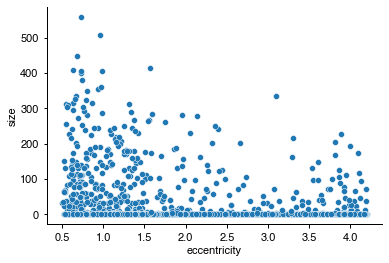

In [ ]:
prf_df = pd.DataFrame(prf_dict).reset_index().rename(columns={'index': 'voxel'})

sns.scatterplot(data=prf_df, x='eccentricity', y='size')

In [ ]:
betas_dict_x, betas_dict_y = ('voxel','stim_idx')
betas_df = prep.melt_2D_betas_dict_into_df(betas_dict, betas_dict_x, betas_dict_y, True)
betas_df
betas_prf_df = prep.add_1D_prf_dict_to_df(prf_dict, betas_df, roi_dict, on='voxel')
betas_prf_stim_df = prep.merge_stim_df_and_betas_df(stim_df, betas_prf_df, on=('stim_idx'))
betas_prf_stim_df = betas_prf_stim_df.drop(columns=['task_x', 'task_y'])



In [12]:
betas_prf_stim_df

,trial,image_idx,run,task_x,stim_idx,w_r,w_a,phase,class_idx,phase_idx,...,freq_lvl,voxel,task_y,betas,eccentricity,angle,size,visualrois,vroinames,eccrois
0,673,105,7,memory,0,0.0,-6.0,0.000000,0,0,...,0,0,avg,2.753333,1.370705,5.098831,84.840942,2.0,V1,3.0
1,673,105,7,memory,0,0.0,-6.0,0.000000,0,0,...,0,1,avg,2.185000,1.270235,5.079485,170.579865,2.0,V1,3.0
2,673,105,7,memory,0,0.0,-6.0,0.000000,0,0,...,0,2,avg,1.640000,1.153417,5.030798,220.494080,2.0,V1,3.0
3,673,105,7,memory,0,0.0,-6.0,0.000000,0,0,...,0,3,avg,2.803333,1.270225,5.121726,180.973740,2.0,V1,3.0
4,673,105,7,memory,0,0.0,-6.0,0.000000,0,0,...,0,4,avg,2.506667,1.247216,5.121479,249.670349,2.0,V1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823643,501,216,5,memory,111,14.0,34.0,4.712389,27,6,...,3,3672,avg,3.061667,1.389418,6.172262,31.089304,2.0,V1,2.0
823644,501,216,5,memory,111,14.0,34.0,4.712389,27,6,...,3,3673,avg,0.660000,1.580535,0.211432,5.767000,2.0,V1,2.0
823645,501,216,5,memory,111,14.0,34.0,4.712389,27,6,...,3,3674,avg,2.225000,1.378613,6.146842,131.498123,2.0,V1,3.0
823646,501,216,5,memory,111,14.0,34.0,4.712389,27,6,...,3,3675,avg,-1.371667,1.249840,0.088246,53.251953,2.0,V1,2.0


In [59]:
df = prep.make_sf_dataframe(stim_info,
                        design_mat,
                        rois, rois_vals,
                        prfs,
                        betas,
                        drop_phase=False, force_download=False,
                        task_keys=['fixation','memory'], task_average=False,
                        angle_to_radians=True)




In [19]:
from scipy.io import loadmat
import h5py
mat_file = loadmat(design_mat)
ww = mat_file['masterordering'].reshape(-1)

with h5py.File(betas, 'r') as f:
    # betas[hemi].shape shows 784 x # of voxels
    tmp_betas = f.get('betas')
    if mask is None:
        mask = np.ones((tmp_betas.shape[-1],), bool)
    tmp_betas = tmp_betas[:, mask]



In [126]:
hemi = 'lh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsynthetic_sf_stim_description.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

In [127]:
lh_df = prep.make_sf_dataframe(stim_info,
                              design_mat,
                              rois, rois_vals,
                              prfs,
                              betas,
                              drop_phase=False, force_download=False,
                              task_keys=['fixation_task','memory_task'],
                              task_average=True,
                              angle_to_radians=True)

File successfully downloaded and saved as /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv


In [112]:
hemi = 'rh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsynthetic_sf_stim_description.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

In [113]:
rh_df = prep.make_sf_dataframe(stim_info,
                              design_mat,
                              rois, rois_vals,
                              prfs,
                              betas,
                              task_keys=['fixation_task','memory_task'],
                              task_average=True,
                              angle_to_radians=True)

In [115]:
sf_df = prep.concat_lh_rh_df(lh_df, rh_df)

In [117]:
sf_df.iloc[sf_df.query('hemi == "lh"').shape[0]-3:sf_df.query('hemi == "lh"').shape[0]+3]

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori,hemi
1235469,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,fixation,2.303333,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235470,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,memory,3.270000,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235471,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,avg,2.786667,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235472,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,fixation,2.330000,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh
1235473,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,memory,1.103333,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh
1235474,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,avg,1.716667,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh


In [2]:
sf_df = pd.read_csv('/Users/auna/Dropbox/NYU/Projects/SF/5_voxel_example.csv')

In [4]:
sf_df

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori
0,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,fixation,1.966667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
1,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,memory,0.676667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
2,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,avg,1.321667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
3,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,fixation,1.883333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
4,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,memory,0.763333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,memory,0.876667,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2012,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,avg,1.195000,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2013,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,fixation,1.170000,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867
2014,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,memory,0.656667,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867


In [13]:
vs_df = vs.drop_voxels_with_negative_mean_amplitudes(sf_df)
vs_df.groupby('voxel').filter(lambda x: (x.eccentricity + x.size <= 180).all())

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori


In [12]:
vs_df

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori
0,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,fixation,1.966667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
1,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,memory,0.676667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
2,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,avg,1.321667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
3,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,fixation,1.883333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
4,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,memory,0.763333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,memory,0.876667,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2012,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,avg,1.195000,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2013,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,fixation,1.170000,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867
2014,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,memory,0.656667,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867


In [242]:
vs_df = vs.select_voxels(sf_df, drop_by=True, inner_border=vs.pix_to_deg(42.878), outer_border=vs.pix_to_deg(714/2), return_voxel_list=False)
print(sf_df.voxel.nunique() - vs_df.voxel.nunique())
vs_df.voxel.nunique()

4784


2308

In [262]:
df =pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-None.csv')
size_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-pRFsize.csv')
center_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-pRFcenter.csv')
print(df.shape)
print(size_df.shape)
print(center_df.shape)


(2382912, 20)
(787584, 20)
(1352064, 20)


In [265]:
vs.pix_to_deg(42.878)
vs.pix_to_deg(714/2)

4.198755299029564

In [273]:
center_df.query('eccentricity < 0.5')

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori,hemi


In [247]:
a = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/subj01_stim_voxel_info_df_vs-pRFsigma_V1_mean_fix.csv')
a.voxel.nunique()
np.sort(vs_df.voxel.unique())


array([  10,   11,   12, ..., 7089, 7090, 7091])

In [14]:
p_dict = {1: 'noise_SD', 2: 'sigma_v_squared'}
p_dict.items()

dict_items([(1, 'noise_SD'), (2, 'sigma_v_squared')])

In [122]:
from sfp import stimuli
sn_list = np.arange(1,9)
roi_list = ['V1','V2','V3','h4v']

for sn, roi in itertools.product(sn_list, roi_list):
    subj = utils.sub_number_to_string(sn, 'nsdsyn')
    print(f'**subject {subj} {roi}')
    s = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/{subj}_stim_voxel_info_df_vs-pRFsigma_{roi}_mean_fix.csv')
    print(f'max angle: {s.angle.max()}')
    random_vox = s.iloc[0]
    print(f'stored data: voxel: {random_vox.voxel}, ecc: {random_vox.eccentricity}, angle: {random_vox.angle}\nlocal orientation: {random_vox.local_ori}, local sf: {random_vox.local_sf}')
    _, _, local_sf2, local_ori2 = stimuli.sf_cpd(714/2, 4.2, eccen=random_vox.eccentricity, angle=random_vox.angle, w_r=random_vox.w_r, w_a=random_vox.w_a)
    print(f'Billy function: local orientation: {local_ori2}, local sf: {local_sf2}')
    if np.round(random_vox.local_ori,4) != np.round(local_ori2, 4):
        print('! different local orientation')
    if np.round(random_vox.local_sf,4) != np.round(local_sf2, 4):
        print('! different local sf')

**subject subj01 V1
max angle: 6.28249448319282
stored data: voxel: 23, ecc: 1.5560641288757324, angle: 5.030774682393625
local orientation: 0.3183857020089355, local sf: 0.6136827145043924
Billy function: local orientation: 0.31838570200893535, local sf: 0.6136827145043924
**subject subj01 V2
max angle: 6.282144543825583
stored data: voxel: 17, ecc: 1.5684274435043335, angle: 5.022842190770715
local orientation: 0.3104532103860249, local sf: 0.608845288002469
Billy function: local orientation: 0.31045321038602475, local sf: 0.608845288002469
**subject subj01 V3
max angle: 6.279914945360969
stored data: voxel: 1130, ecc: 2.7071726322174072, angle: 5.812868928142721
local orientation: 1.1004799477580312, local sf: 0.3527405852094488
Billy function: local orientation: 1.100479947758031, local sf: 0.35274058520944884
**subject subj01 h4v
max angle: 6.270196537911052
stored data: voxel: 8196, ecc: 1.372119665145874, angle: 6.07241901008519
local orientation: 1.3600300297005, local sf: 0.69